### Wordcloud Ideas:

- Included Part-of-Speech tags
    - Nouns
    - (aux/)verbs
    - nouns/(aux/)verbs
- size --> 20-50 words?
- absolute vs relative (e.g. tf-idf) word frequency
    - words like 'art, year, opera' show up very often!
    - potentially normalised by looking up general word frequency (wordfreq library), tf-idf or document frequency.
    - Could display words above certain relevancy threshold x


In [3]:
import requests
import numpy as np
import matplotlib.pyplot as plt

from io import BytesIO
from PIL import Image
from wordcloud import WordCloud

from tqdm.notebook import tqdm
from wordfreq import word_frequency
import os
import pickle
from collections import Counter

import pandas as pd

In [1]:
!python -m spacy download en_core_web_lg

     -------------------------------------- 400.7/400.7 MB 1.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


You should consider upgrading via the 'C:\Users\deejay\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\citynet\venv_citynet\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!python -m spacy download en_core_web_lg

'python' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
#!python -m spacy download en_core_web_lg

import spacy
# nlp = spacy.load("en_core_web_sm")
nlp = spacy.load('en_core_web_lg')
# from diedfunctions import *

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# !pip install requests
# !pip install matplotlib
# !pip install wordcloud
# !pip install wordfreq

# 0. Settings up wordcloud

In [ ]:
'''
def black_circle():
    response = requests.get('https://i.ibb.co/kHNWRYD/black-circle-better.png')
    circle_mask = np.array(Image.open(BytesIO(response.content)))
    return circle_mask 

circle_mask = black_circle()
wordcloud = WordCloud(background_color='#fff',
                      # font_path='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf',
                      color_func=lambda *args, **kwargs: (0,0,0),
                      mask=circle_mask)
                      '''

# 1. NOUNS ONLY

## 1.1 Import Nouns per city pair

In [4]:
CORPUS_PATH = '../../../../data/corpus_real_words.csv'

corpus = pd.read_csv(CORPUS_PATH)
corpus.set_index('word', inplace=True)
corpus

,paris_london,london_manchester,london_birmingham,london_berlin,paris_berlin,paris_rome,london_glasgow,berlin_vienna,paris_vienna,madrid_barcelona,...,katowice_copenhagen,athens_katowice,milan_katowice,naples_katowice,katowice_manchester,lisbon_katowice,katowice_glasgow,birmingham_katowice,katowice_turin,katowice_valencia
word,,,,,,,,,,,,,,,,,,,,,
costa,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
aboriginal,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
affidavit,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
gangplank,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
flotilla,4.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
conspectus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
pron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
polonization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
wordcloud = initialize_wordcloud()

NameError: name 'initialize_wordcloud' is not defined

In [7]:
WORDCLOUD_LOCATION = f'../../../../data/wordclouds/NOUNS/CORPUS/'

create_wordcloud_from_df(corpus, WORDCLOUD_LOCATION=WORDCLOUD_LOCATION)

lemmatized_wordlists:   0%|          | 0/434 [00:00<?, ?it/s]

(['paris', 'london'], [('art', 6559.0), ('year', 5935.0), ('work', 4572.0), ('time', 4308.0), ('city', 3549.0)])                               

NameError: name 'wordcloud' is not defined

In [89]:
batch = 'biggest_cities_30'

WORDLIST_LOCATION = f'../../../../data/enwiki_city_pairs_nouns/{batch}/'
WORDCLOUD_LOCATION = f'../../../../data/wordclouds/NOUN/'
OVERRIDE_OLD_WORDCLOUDS = False

In [ ]:
words = []
city_pairs = []
for file in os.scandir(WORDLIST_LOCATION):
    with open(file.path, 'rb') as fp:
        words.append(pickle.load(fp))
        city_pairs.append(file.name.split('__')[1])

In [ ]:
', '.join(city_pairs)
len(city_pairs)

# 2. VERBS ONLY

In [ ]:
for x in data[:10]:
    print(len(x[0]), x[1])

In [11]:
POS = 'VERB'
data = import_lemmatised_wordlists(PATH=f'../../../../data/enwiki_city_pairs_lemmatised/{POS}/')

In [17]:
data[0]

(['simplify',
  'reduce',
  'eliminate',
  'avoid',
  'change',
  'delete',
  'perform',
  'work',
  'include',
  'remove',
  'restore',
  'perform',
  'conduct',
  'pull',
  'leave',
  'dodge',
  'scramble',
  'continue',
  'rely',
  'want',
  'look',
  'pave',
  'give',
  'install',
  'cut',
  'serve',
  'lay',
  'boast',
  'instal',
  'buy',
  'commute',
  'elevate',
  'consolidate',
  'experience',
  'secure',
  'marry',
  'honeymoon',
  'return',
  'live',
  'lease',
  'bear',
  'convert',
  'baptise',
  'confirm',
  'surround',
  'grow',
  'devise',
  'base',
  'envisage',
  'improve',
  'expand',
  'produce',
  'accord',
  'lead',
  'carry',
  'locate',
  'rank',
  'determine',
  'surpass',
  'serve',
  'cause',
  'delay',
  'reinforce',
  'support',
  'realize',
  'intervene',
  'control',
  'invade',
  'protest',
  'deter',
  'confederate',
  'end',
  'consider',
  'distract',
  'ensure',
  'remain',
  'move',
  'participate',
  'record',
  'sell',
  'want',
  'stage',
  'tran

In [6]:
def create_wordcloud(data, WORDCLOUD_LOCATION, OVERRIDE_OLD_WORDCLOUDS = False):
    """
    -->
        function that creates wordcloud for a list of lemmatized wordlists.

        Parameters:
        -----------
            data: list of tuples -> Output from 'import_lemmatised_wordlists' (i.e. wordlist, parent_dir, filename (with city pair names)). 
            OVERRIDE_OLD_WORLDCLOUDS: bool (default = False) -> whether you want to override existing wordclouds
            WORDCLOUD_LOCATION: str -> Path to save wordclouds to

    """
    if not os.path.isdir(WORDCLOUD_LOCATION):
        raise Exception("Path is an invalid directory.")
        
    for i in tqdm(range(len(data)), desc='lemmatized_wordlists'):       
        os.makedirs(os.path.join(WORDCLOUD_LOCATION, data[i][1]), exist_ok=True)
        filename = f"{WORDCLOUD_LOCATION}/{data[i][1]}/{data[i][-1]}.png"
        
        if OVERRIDE_OLD_WORDCLOUDS or not os.path.exists(filename):
            
            print(filename)
            continue
            wordfreq = Counter(data[i][0])
                
            # remove both cities from wordcloud
            cities = data[i][-1].split('_')
            for city in cities:
                wordfreq[city] = 0
                
            print(f"\r{data[i][2], wordfreq.most_common(4)}", end="                               ")
    
            wordcloud.generate_from_frequencies(wordfreq)
            wordcloud.to_file(filename)
        else:
            print('already exists...')
            
def create_wordcloud_from_df(df, WORDCLOUD_LOCATION, OVERRIDE_OLD_WORDCLOUDS = False):
    if not os.path.isdir(WORDCLOUD_LOCATION):
        raise Exception("Path is an invalid directory.")

    for city_pair in tqdm(df, total=len(df.columns), desc='lemmatized_wordlists'):
        filename = os.path.join(WORDCLOUD_LOCATION,city_pair + '.png')
        
        if OVERRIDE_OLD_WORDCLOUDS or not os.path.exists(filename):
            
            wordfrequency = df[city_pair].to_dict()

            # remove both cities from wordcloud
            cities = city_pair.split('_')
            for city in cities:
                wordfrequency[city] = 0

            print(f"\r{cities, sorted(wordfrequency.items(), key=lambda x: x[1], reverse=True)[:5]}", end="                               ")

            wordcloud.generate_from_frequencies(wordfrequency)
            print(filename)
            wordcloud.to_file(filename)
        else:        
            print(f"\rwordcloud for {city_pair} already exists.", end="                               ")
        break
        

In [92]:
create_wordcloud(data=data, WORDCLOUD_LOCATION=WORDCLOUD_LOCATION)

lemmatized_wordlists:   0%|          | 0/434 [00:00<?, ?it/s]

already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already exists...
already ex

In [83]:
os.path.isdir(WORDCLOUD_LOCATION)

True

# 3. VERBS ONLY (Relative Term Frequency)

In [3]:
tf = pd.read_csv('../../../../data/tf.csv')
tf.set_index('word', inplace=True)

In [143]:
tf['paris_london'].sort_values(ascending=False)[:10]

word
include    0.640257
work       0.411261
study      0.401310
bear       0.364781
return     0.328001
take       0.326867
perform    0.315531
move       0.293488
begin      0.283159
write      0.260234
Name: paris_london, dtype: float64

In [134]:
WORDCLOUD_LOCATION2 = f'../../../../data/wordclouds/verb_tf/'

create_wordcloud_from_df(tf, WORDCLOUD_LOCATION=WORDCLOUD_LOCATION2)

lemmatized_wordlists:   0%|          | 0/434 [00:00<?, ?it/s]

(['paris', 'london'], [('include', 0.6402569593147751), ('work', 0.4112608640886762), ('study', 0.4013099886635596), ('bear', 0.3647814586219927), ('return', 0.3280010076835873)])                               ../../../../data/wordclouds/verb_tf/paris_london.png


# 4. VERBS ONLY (Relative Term Frequency - Inverse Document Frequency)

In [120]:
tfidf = pd.read_csv('../../../../data/new_tfidf.csv')
tfidf.set_index('word', inplace=True)

In [159]:
for x in tfidf.columns[:10]:
    print(tfidf[x].sort_values(ascending=False)[:10])

# print(tfidf.loc['work']['paris_london'])

word
publish    0.033863
marry      0.031141
paint      0.028128
exhibit    0.027286
write      0.027152
study      0.024792
seven      0.024528
educate    0.023600
live       0.023166
dance      0.022473
Name: paris_london, dtype: float64
word
manchester    0.079589
leed          0.061868
midland       0.030748
educate       0.030269
unite         0.029377
sheffield     0.029313
build         0.027561
amalgamate    0.025447
wigan         0.022909
liverpool     0.021897
Name: london_manchester, dtype: float64
word
study       0.024402
publish     0.019046
flee        0.018078
marry       0.017770
arrest      0.015623
settle      0.015430
write       0.015249
live        0.015086
emigrate    0.014329
graduate    0.013909
Name: paris_berlin, dtype: float64
word
film        0.019632
publish     0.018293
release     0.017203
schocken    0.016654
irve        0.016485
write       0.016261
star        0.014975
premiere    0.014937
base        0.014786
tell        0.014767
Name: london_berlin,

In [131]:
WORDCLOUD_LOCATION3 = f'../../../../data/wordclouds/verb_tfidf/'

create_wordcloud_from_df(tfidf, WORDCLOUD_LOCATION=WORDCLOUD_LOCATION3)

lemmatized_wordlists:   0%|          | 0/434 [00:00<?, ?it/s]

(['paris', 'london'], [('publish', 0.0338626278109958), ('marry', 0.0311413452527918), ('paint', 0.0281275446709393), ('exhibit', 0.0272855184201941), ('write', 0.0271520580075161)])                               ../../../../data/wordclouds/verb_tfidf/paris_london.png


In [225]:
file_path = "../../../../data/enwiki_city_pairs_lemmatised/VERB/biggest_cities_20/VERB__london_manchester__.pickle"

"C:\\Users\\diede\\Personal Files [Local]\\Applied Data Science\\Thesis - CITYNET\data\enwiki_city_pairs_lemmatised\VERB\biggest_cities_20\VERB__london_manchester__.pickle".replace('\\', '/')
os.path.exists(file_path)
with open(file_path, 'rb') as fp:
    d = pickle.load(fp)
d

['embark',
 'change',
 'regard',
 'open',
 'anticipate',
 'mount',
 'produce',
 'include',
 'write',
 'attract',
 'continue',
 'visit',
 'end',
 'sell',
 'reveal',
 'receive',
 'fill',
 'turn',
 'reproduce',
 'write',
 'creem',
 'perform',
 'come',
 'film',
 'know',
 'film',
 'hold',
 'play',
 'exclude',
 'host',
 'host',
 'face',
 'threaten',
 'leave',
 'ride',
 'attend',
 'find',
 'praise',
 'punish',
 'speak',
 'wash',
 'win',
 'receive',
 'test',
 'result',
 'waive',
 'focus',
 'excel',
 'jog',
 'claim',
 'accompany',
 'share',
 'conscript',
 'serve',
 'post',
 'woolwich',
 'accord',
 'respond',
 'publish',
 'bury',
 'edit',
 'stem',
 'pressure',
 'respond',
 'provide',
 'affect',
 'accord',
 'suggest',
 'distribute',
 'challenge',
 'highlight',
 'refer',
 'derive',
 'sell',
 'adjoin',
 'mean',
 'come',
 'come',
 'neighbour',
 'commute',
 'follow',
 'have',
 'run',
 'refer',
 'include',
 'develop',
 'intensify',
 'compete',
 'list',
 'unite',
 'follow',
 'list',
 'lie',
 'serve',
 

In [183]:
c = pd.read_csv('../../../../data/corpus.csv')
c.set_index('word', inplace=True)

In [190]:
c.loc['manchester']['london_manchester']#.value_counts()

177.0

In [194]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [218]:
l = list(c.index)
l2 = [str(x) for x in l]

processed_text = nlp('  '.join(l2))
lemmatized_text = [token.lemma_ for token in processed_text if token.pos_ == 'VERB']
# lemmatized_text = [[word.lemma_ for word in text if word.pos_ not in POS and not word.is_punct and not word.is_stop] for text in processed_text]

In [223]:
lemmatized_text.count('manchester')

0

In [50]:
tdict

{nan: 0.0001259604484191,
 'gainsborough': 0.0002519208968383,
 'rostropovich': 0.0001259604484191,
 'downplay': 0.0002519208968383,
 'atom': 0.0002519208968383,
 'compress': 0.0002519208968383,
 'orsay': 0.0001259604484191,
 'knappertsbusch': 0.0001259604484191,
 'vicar': 0.0001259604484191,
 'loot': 0.0018894067262879,
 'unerre': 0.0003778813452575,
 'undress': 0.0001259604484191,
 'title': 0.0245622874417432,
 'rebuff': 0.0006298022420959,
 'catalonia': 0.0001259604484191,
 'pier': 0.0001259604484191,
 'leclerq': 0.0001259604484191,
 'shorten': 0.0025192089683839,
 'obtain': 0.0506361002645169,
 'lopukhova': 0.0001259604484191,
 'cahit': 0.0001259604484191,
 'recover': 0.0095729940798589,
 'roman': 0.0007557626905151,
 'anri': 0.0001259604484191,
 'immigrate': 0.0025192089683839,
 'rochester': 0.0001259604484191,
 'screen': 0.0093210731830205,
 'overtake': 0.0017634462778687,
 'rapallo': 0.0001259604484191,
 'nab': 0.0001259604484191,
 'download': 0.0005038417936767,
 'nose': 0.0001

In [41]:
data[0][2]
wordcloud.generate_from_frequencies(data2)

[[(nan, 0.0001259604484191),
  ('gainsborough', 0.0002519208968383),
  ('rostropovich', 0.0001259604484191),
  ('downplay', 0.0002519208968383),
  ('atom', 0.0002519208968383),
  ('compress', 0.0002519208968383),
  ('orsay', 0.0001259604484191),
  ('knappertsbusch', 0.0001259604484191),
  ('vicar', 0.0001259604484191),
  ('loot', 0.0018894067262879),
  ('unerre', 0.0003778813452575),
  ('undress', 0.0001259604484191),
  ('title', 0.0245622874417432),
  ('rebuff', 0.0006298022420959),
  ('catalonia', 0.0001259604484191),
  ('pier', 0.0001259604484191),
  ('leclerq', 0.0001259604484191),
  ('shorten', 0.0025192089683839),
  ('obtain', 0.0506361002645169),
  ('lopukhova', 0.0001259604484191),
  ('cahit', 0.0001259604484191),
  ('recover', 0.0095729940798589),
  ('roman', 0.0007557626905151),
  ('anri', 0.0001259604484191),
  ('immigrate', 0.0025192089683839),
  ('rochester', 0.0001259604484191),
  ('screen', 0.0093210731830205),
  ('overtake', 0.0017634462778687),
  ('rapallo', 0.00012596

In [ ]:
[list(zip(t.index, t)), x]

In [145]:
for i in range(data):
    print(i)

TypeError: 'list' object cannot be interpreted as an integer

In [166]:
CORPUS_PATH = f'../../../../data/corpus.csv'
TF_CSV_PATH = f'../../../../data/tf.csv'

def calculate_corpus_tf_tfidf(data: list, corpus= [], include_tf=False, include_idf=False) -> tuple:
    """

    Calculates the tfidf per speaker per conference

    :return: a tuple containing Rutte texts and De Jonge texts respectively

    """
    if not isinstance(corpus, pd.DataFrame):
        print('check')
        corpus = pd.DataFrame(columns=['word'])
        # nr_of_conferences = len(text_by_speaker[0])

        # Create Dataframe with Word Counts
        for i in tqdm(range(len(data))):
    #         full_conference_text = text_by_speaker[0][i]['text'] + text_by_speaker[1][i]['text']
    #         word = [token.lemma_ for token in nlp(full_conference_text) if
    #                  not (token.is_stop or token.is_punct or token.is_space)]

            word_count = Counter(data[i][0])

            new_word = list(set(word_count.keys()) - set(corpus['word']))
            corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)

            wordlist = []
            for word in corpus['word']:
                if word in word_count.keys():
                    wordlist.append(word_count[word])
                else:
                    wordlist.append(0)

            corpus[data[i][2]] = wordlist

        corpus.set_index('word', inplace=True)
        corpus.fillna(0, inplace=True)

        corpus.to_csv(CORPUS_PATH)
    
    
    if include_tf:
        tf_idf = {k: [] for k in corpus.columns}

        # Create Dataframe with Relative Word Frequencies
        for index, row in tqdm(corpus.iterrows(), total=len(corpus)):
            docs_with = np.count_nonzero(row)

            for colname, count in row.items():
                total_uniques = np.count_nonzero(corpus[colname])
                tf = count / total_uniques
                result = tf
                if include_idf:
                    idf = math.log(len(corpus.columns) / docs_with)
                    result *= idf

                tf_idf[colname].append(result)

        tf_idf_df = pd.DataFrame.from_dict(tf_idf)
        tf_idf_df.set_index(corpus.index, inplace=True)

        if include_idf:
            tf_idf_df.to_csv(TF_IDF_CSV_PATH)
            print(f"Saved results to 'output/corpus.csv and '{TF_IDF_CSV_PATH}'")
            
        else:
            tf_idf_df.to_csv(TF_CSV_PATH)
            print(f"Saved results to 'output/corpus.csv' and '{TF_CSV_PATH}'")
        
        return tf_idf_df
            
    else:
        return corpus

In [147]:
corpus = calculate_corpus_tf_tfidf(data)

  0%|          | 0/434 [00:00<?, ?it/s]

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: P

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: P

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: P

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: P

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: P

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: P

C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corpus[data[i][2]] = wordlist
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus = corpus.append(pd.DataFrame({'word': new_word}), ignore_index=True)
C:\Users\diede\AppData\Local\Temp\ipykernel_21240\121238611.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

In [167]:
tfidf = calculate_corpus_tf_tfidf(data, corpus=corpus, include_tf=True)

  0%|          | 0/26624 [00:00<?, ?it/s]

Saved results to 'output/corpus.csv' and '../../../../data/tf.csv'


In [168]:
tf = pd.load_csv('../../../../data/tf.csv')

AttributeError: module 'pandas' has no attribute 'load_csv'

In [165]:
corpus

,paris_london,london_manchester,paris_berlin,london_berlin,london_birmingham,paris_rome,london_glasgow,berlin_vienna,paris_vienna,madrid_barcelona,...,katowice_copenhagen,milan_katowice,athens_katowice,katowice_manchester,birmingham_katowice,katowice_glasgow,katowice_valencia,naples_katowice,lisbon_katowice,katowice_turin
word,,,,,,,,,,,,,,,,,,,,,
,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
gainsborough,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
rostropovich,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
downplay,2.0,1.0,1.0,2.0,0.0,1.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
atom,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
policyjny,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
simmon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
nikiel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [164]:
corpus['paris_london'].sort_values(ascending=True)[:50]

word
railfreight    0.0
bernerra       0.0
unhook         0.0
tensione       0.0
pontarlier     0.0
maître         0.0
colloque       0.0
barbie         0.0
benight        0.0
leno           0.0
hunslet        0.0
fécamp         0.0
elwell         0.0
rugate         0.0
chirk          0.0
boux           0.0
sandwell       0.0
ivc            0.0
tamworth       0.0
headere        0.0
outjumpe       0.0
ferrybridge    0.0
basford        0.0
ricochet       0.0
mediumwave     0.0
pathé          0.0
aubagne        0.0
76             0.0
plm            0.0
classicise     0.0
epfl           0.0
aja            0.0
hommage        0.0
generalise     0.0
lorient        0.0
lombardy       0.0
morristown     0.0
ambérieu       0.0
brosset        0.0
protestante    0.0
voulait        0.0
conseil        0.0
ténon          0.0
nile           0.0
pathe          0.0
clamart        0.0
kelt           0.0
maxwell        0.0
fakhr          0.0
cnew           0.0
Name: paris_london, dtype: float64

In [45]:
# Normalisation

city_pair = data[0]

wordfreq = Counter(city_pair[0])
mostcommon = wordfreq.most_common(10)

newdict = {}

for idx, word in enumerate(mostcommon):
    #print(word)
    wf = word_frequency(word[0], 'en', wordlist='best', minimum=0.0)
    relative_freq = int(word[1]/wf)
    mostcommon[idx] = word + (wf, relative_freq,)
    print(mostcommon[idx]) # (word, int(word[1]/wf))
    newdict[word[0]] = relative_freq

#print(mostcommon[1])

('include', 5083, 0.000162, 31376543)
('work', 3265, 0.000912, 3580043)
('study', 3186, 0.000182, 17505494)
('bear', 2896, 5.13e-05, 56452241)
('return', 2604, 0.000155, 16800000)
('take', 2595, 0.000832, 3118990)
('perform', 2505, 4.57e-05, 54814004)
('move', 2330, 0.000224, 10401785)
('begin', 2248, 6.92e-05, 32485549)
('write', 2066, 0.000107, 19308411)


In [48]:
newdict

{'include': 31376543,
 'work': 3580043,
 'study': 17505494,
 'bear': 56452241,
 'return': 16800000,
 'take': 3118990,
 'perform': 54814004,
 'move': 10401785,
 'begin': 32485549,
 'write': 19308411}

In [63]:
tdict
# td = dict(sorted(tdict.items(), key=lambda x:x[1], reverse=True))

{nan: 0.0001259604484191,
 'gainsborough': 0.0002519208968383,
 'rostropovich': 0.0001259604484191,
 'downplay': 0.0002519208968383,
 'atom': 0.0002519208968383,
 'compress': 0.0002519208968383,
 'orsay': 0.0001259604484191,
 'knappertsbusch': 0.0001259604484191,
 'vicar': 0.0001259604484191,
 'loot': 0.0018894067262879,
 'unerre': 0.0003778813452575,
 'undress': 0.0001259604484191,
 'title': 0.0245622874417432,
 'rebuff': 0.0006298022420959,
 'catalonia': 0.0001259604484191,
 'pier': 0.0001259604484191,
 'leclerq': 0.0001259604484191,
 'shorten': 0.0025192089683839,
 'obtain': 0.0506361002645169,
 'lopukhova': 0.0001259604484191,
 'cahit': 0.0001259604484191,
 'recover': 0.0095729940798589,
 'roman': 0.0007557626905151,
 'anri': 0.0001259604484191,
 'immigrate': 0.0025192089683839,
 'rochester': 0.0001259604484191,
 'screen': 0.0093210731830205,
 'overtake': 0.0017634462778687,
 'rapallo': 0.0001259604484191,
 'nab': 0.0001259604484191,
 'download': 0.0005038417936767,
 'nose': 0.0001

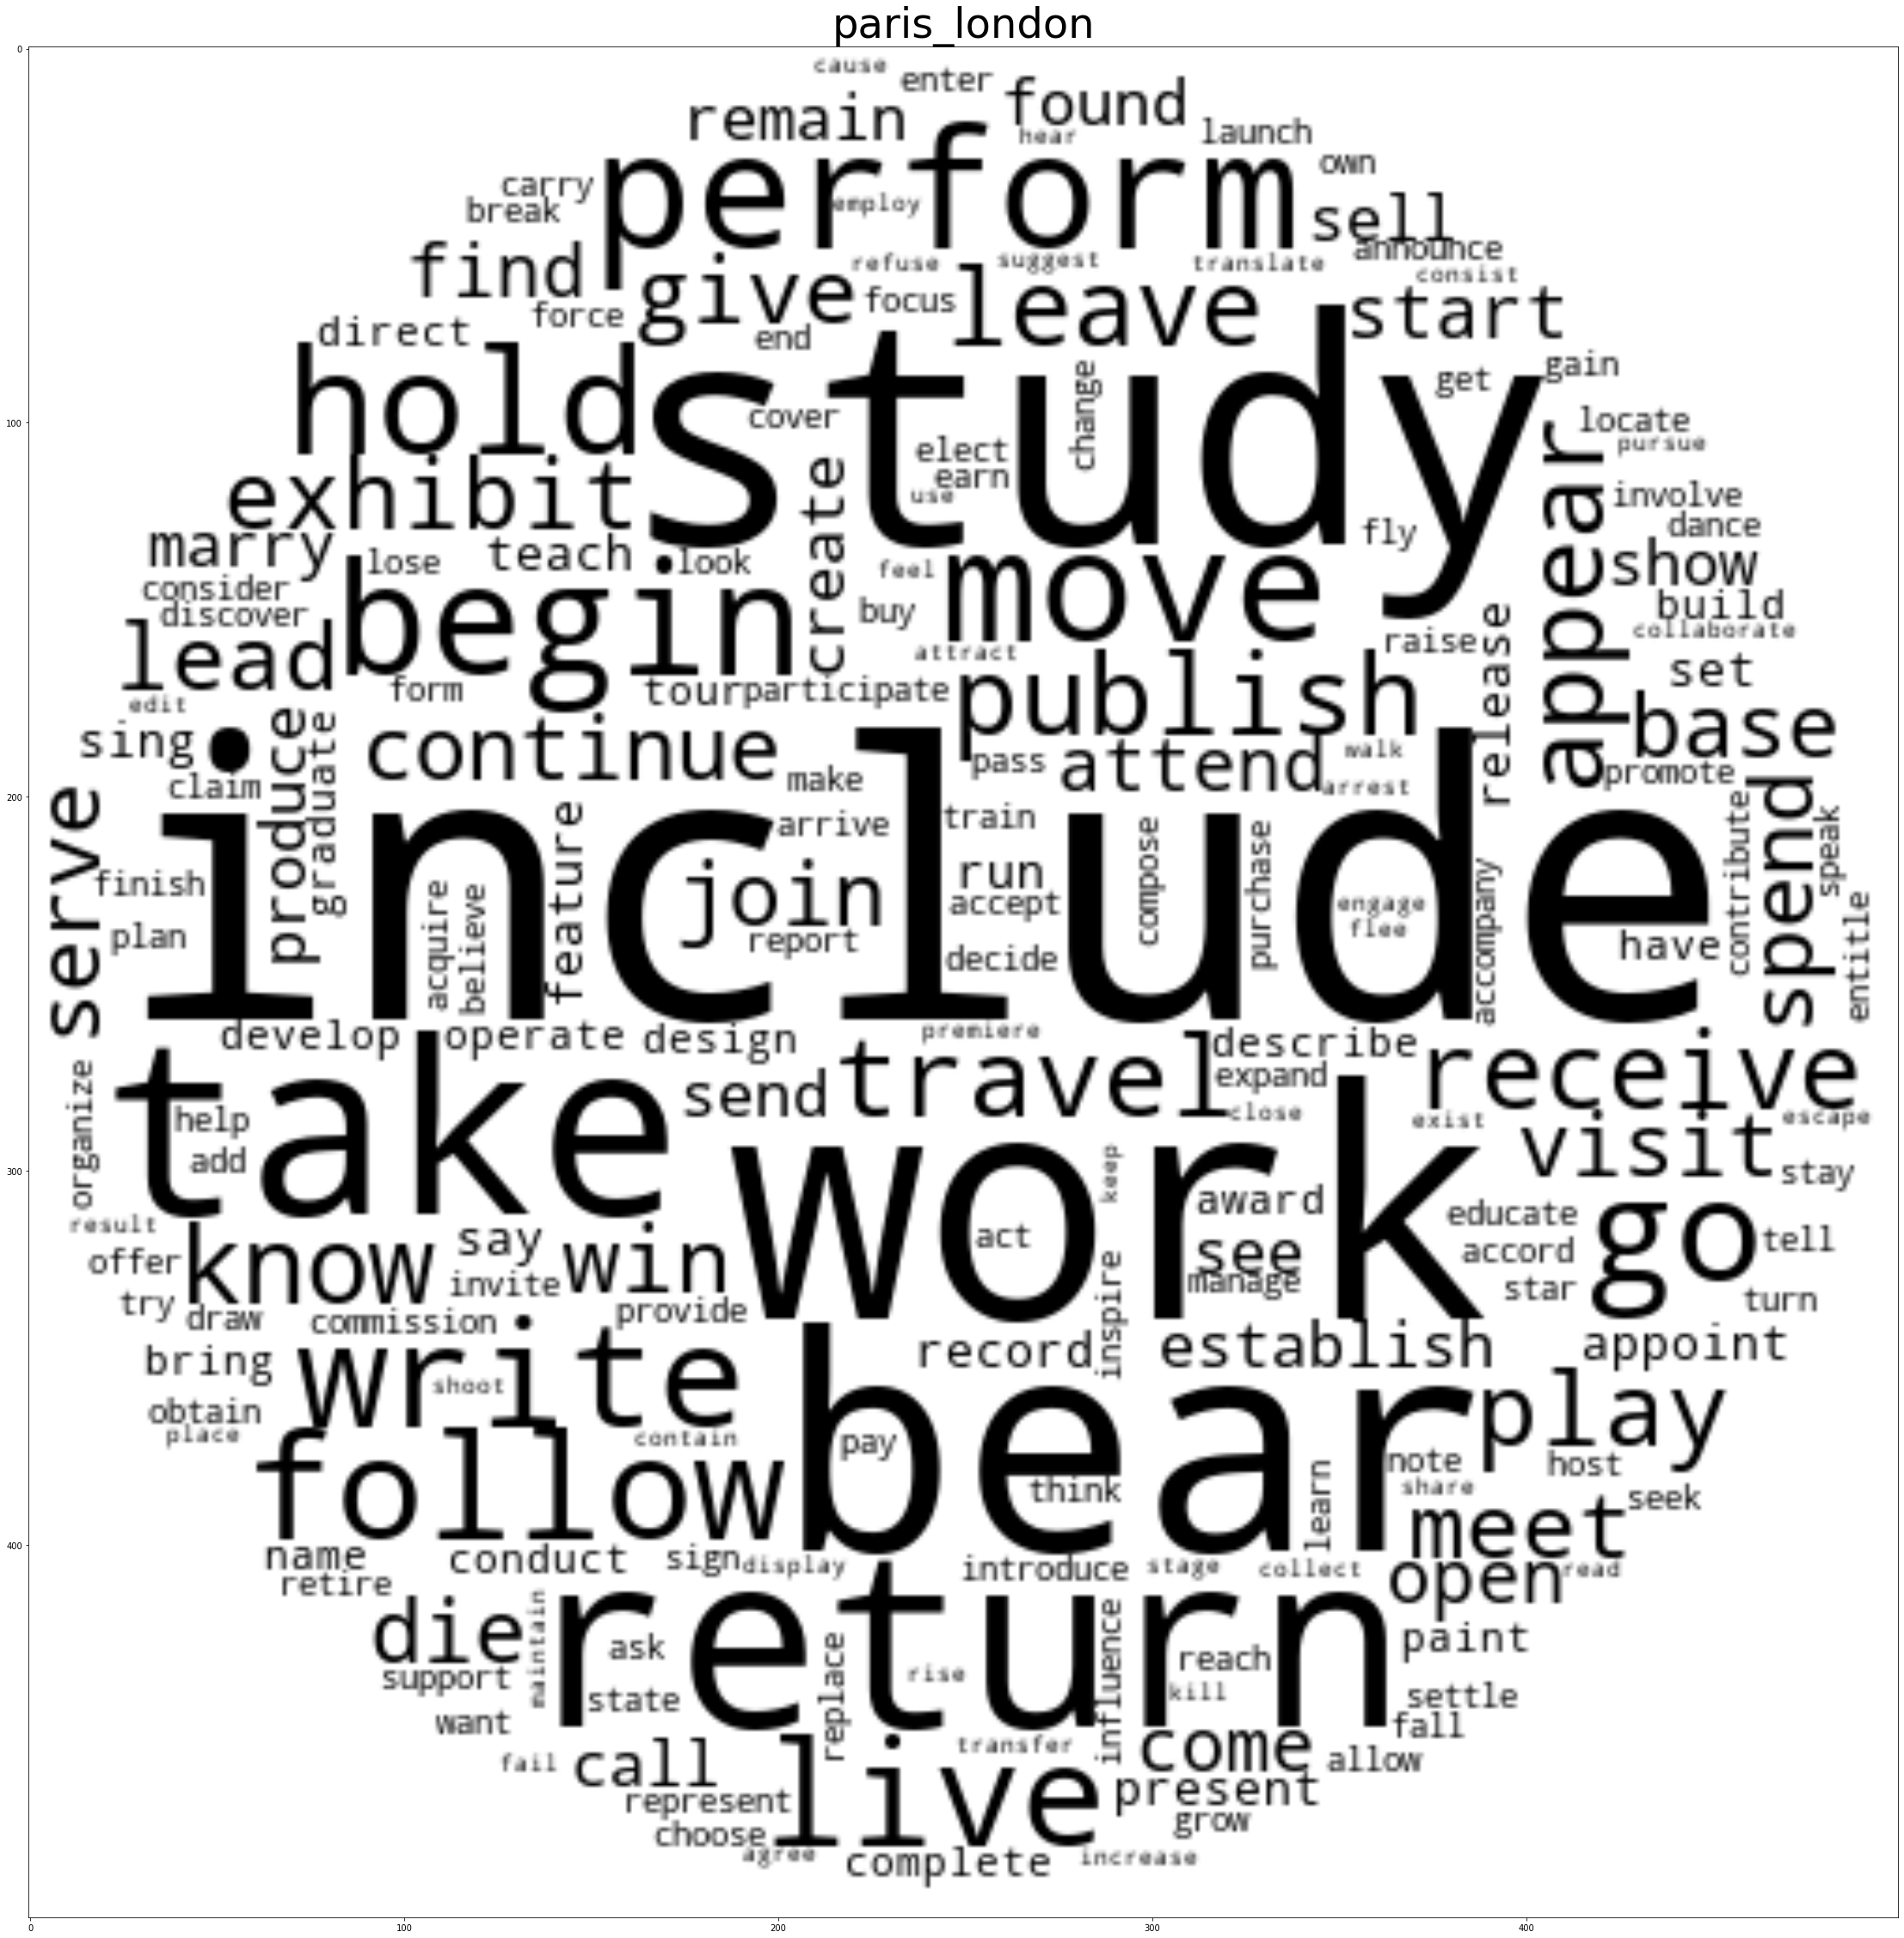

In [64]:
plt.figure(figsize=(40,40))
wordcloud.generate_from_frequencies(tdict)
plt.title(label=f"{city_pair[2]}", fontsize= 48)
plt.imshow(wordcloud, interpolation='bilinear')


In [65]:
wordcloud.words_

{'include': 1.0,
 'work': 0.6423372024395043,
 'study': 0.6267951996852252,
 'bear': 0.5697422781821759,
 'return': 0.5122958882549675,
 'take': 0.5105252803462523,
 'perform': 0.492819201259099,
 'move': 0.45839071414518984,
 'begin': 0.44225850875467243,
 'write': 0.406452882156207,
 'hold': 0.4050757426716506,
 'go': 0.3952390320676766,
 'follow': 0.3885500688569742,
 'live': 0.3741884713751722,
 'publish': 0.36867991343694667,
 'travel': 0.3596301396812905,
 'receive': 0.33346448947471957,
 'know': 0.33071021050560695,
 'appear': 0.33051347629352745,
 'leave': 0.3216604367499507,
 'play': 0.31005311823726134,
 'exhibit': 0.30847924454062564,
 'win': 0.2840842022427699,
 'meet': 0.2801495180011804,
 'lead': 0.273067086366319,
 'give': 0.2714932126696833,
 'continue': 0.2522132598858941,
 'visit': 0.25142632303757617,
 'join': 0.25083612040133774,
 'serve': 0.24277001770607906,
 'die': 0.23706472555577413,
 'base': 0.2360810544953767,
 'spend': 0.23470391501082027,
 'attend': 0.23253

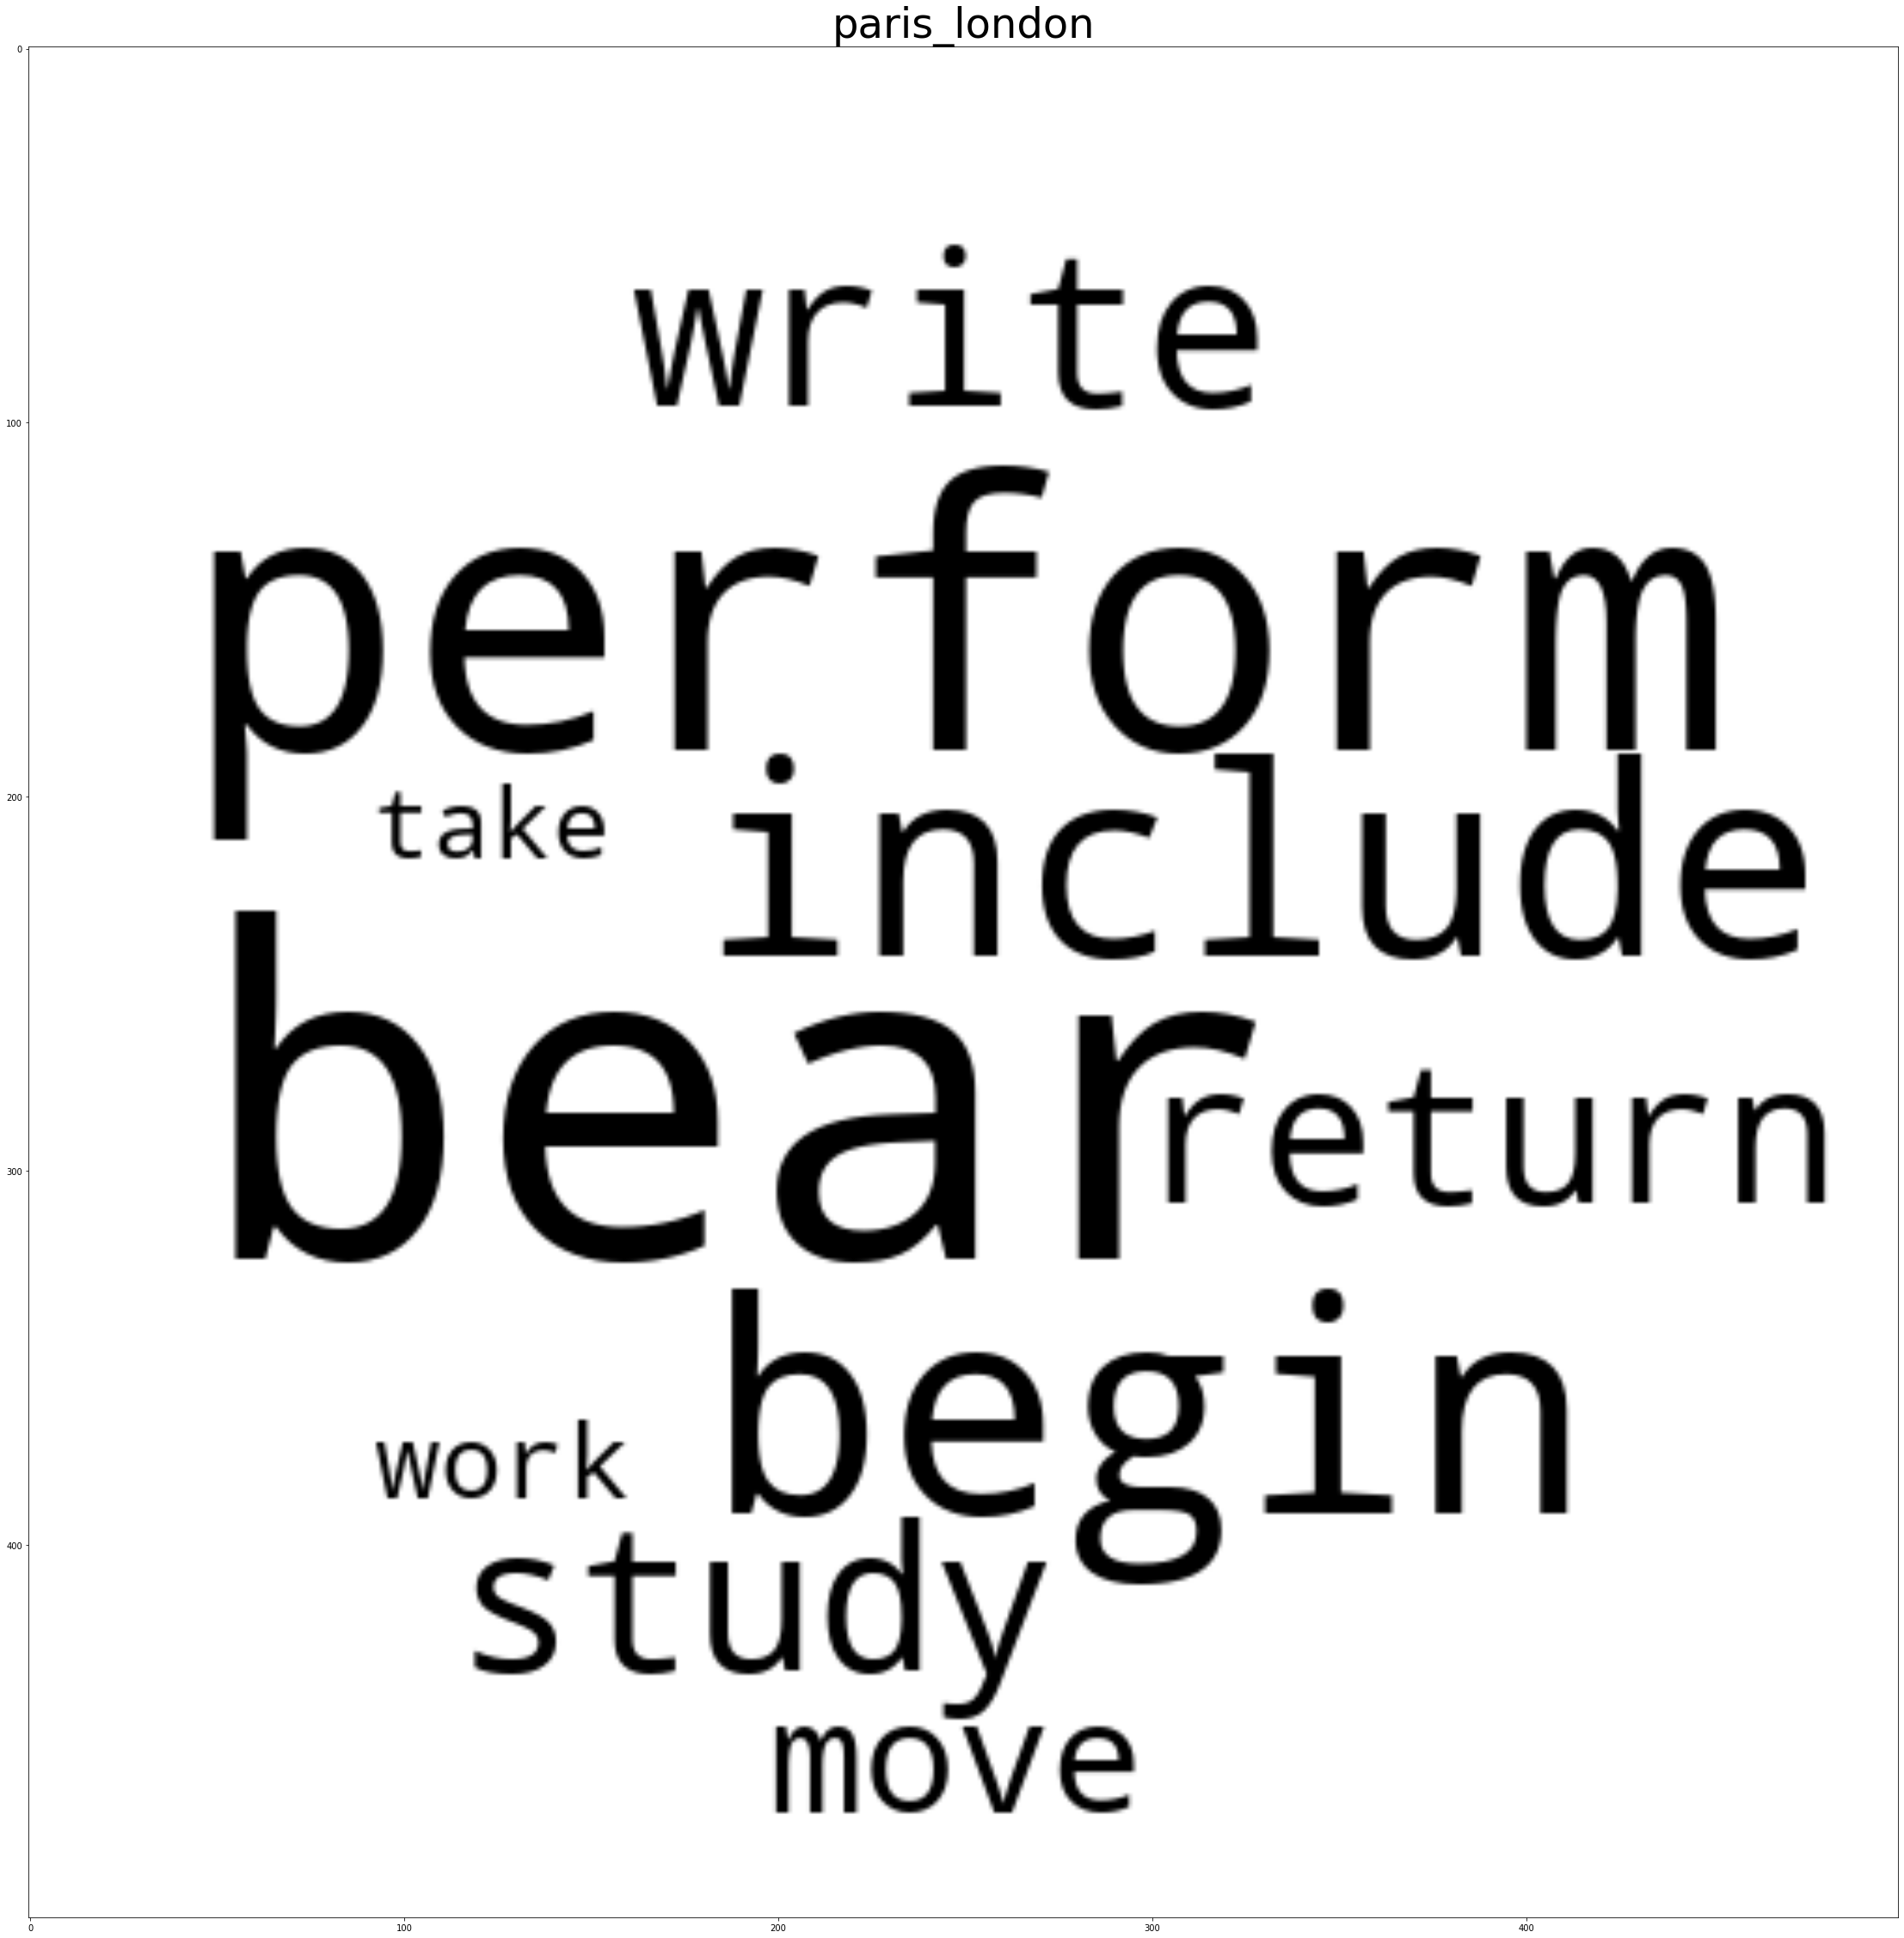

In [59]:
sorted_data = sorted(mostcommon, key=lambda x: x[3], reverse=True)
#sorted(newdict, key=lambda x: len(x[0]), reverse=True)

plt.figure(figsize=(40,40))
wordcloud.generate_from_frequencies(newdict)
plt.title(label=f"{city_pair[2]}", fontsize= 48)
plt.imshow(wordcloud, interpolation='bilinear')

In [136]:
wordcloud.words_

{'appoint': 1.0,
 'publish': 0.9302597927690113,
 'exhibit': 0.6763683346758069,
 'accord': 0.47152166191095074,
 'educate': 0.38490348391335594,
 'bear': 0.35309079691831086,
 'perform': 0.34284414598604646,
 'establish': 0.2195653835618797,
 'marry': 0.21530059133824536,
 'attend': 0.20825446727034228,
 'begin': 0.2031867678156273,
 'include': 0.19625028831736985,
 'announce': 0.16976993010374472,
 'invite': 0.15073782195184235,
 'receive': 0.14974131355908218,
 'appear': 0.14841617168210514,
 'arrive': 0.13708176906090314,
 'settle': 0.13551809864382303,
 'sing': 0.13158263417407076,
 'participate': 0.1255692706338774,
 'operate': 0.12351016688184961,
 'write': 0.12076796432609786,
 'paint': 0.12074747398895244,
 'introduce': 0.1152037494765066,
 'graduate': 0.11460318119739614,
 'travel': 0.11433558089689871,
 'study': 0.10949129241669447,
 'serve': 0.10901521106682859,
 'conduct': 0.10789798106318818,
 'return': 0.10507865202778437,
 'teach': 0.1034428088389335,
 'describe': 0.101

In [111]:
# 0.3/0.01

wordfreq = Counter(data[i][0])
wordfreq

Counter({'conduct': 3,
         'invite': 1,
         'include': 3,
         'perform': 2,
         'name': 1,
         'collaborate': 1,
         'graduate': 1,
         'win': 1,
         'complete': 1,
         'launch': 1,
         'begin': 1,
         'teach': 1,
         'refer': 1,
         'mark': 1,
         'fund': 1,
         'baritone': 1})

<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<!-- <br>
<br>
<br>
<br>
<br>
<br> -->
<div style="height: 500px;"></div>

## 1.2 Create Wordclouds per city pair

In [24]:
WORDCLOUD_LOCATION = f'../../../../data/wordclouds/VERB'
OVERRIDE_OLD_WORDCLOUDS = False

for i in tqdm(range(len(data))):
    os.makedirs(os.path.join(WORDCLOUD_LOCATION, data[i][1]), exist_ok=True)
    filename = f"{WORDCLOUD_LOCATION}/{data[i][1]}/{data[i][2]}.png"
    
    if not OVERRIDE_OLD_WORDCLOUDS and os.path.exists(filename):
        continue
        
    wordfreq = Counter(data[i][0])

    # remove both cities from wordcloud
    cities = data[i][2].split('_')
    for city in cities:
        wordfreq[city] = 0

    print(f"\r{data[i][2], wordfreq.most_common(4)}", end="")
    
    wordcloud.generate_from_frequencies(wordfreq)
    wordcloud.to_file(filename)     

  0%|          | 0/434 [00:00<?, ?it/s]

('katowice_turin', [('conduct', 3), ('include', 3), ('perform', 2), ('invite', 1)])])]))])))

In [ ]:
PATH=f'../../../../data/enwiki_city_pairs_lemmatised/{POS}/'
for root, dirs, files in os.walk(PATH, topdown=True):
        for name in files:
            file_path = os.path.join(root, name)
            print(os.path.basename(os.path.dirname(file_path)))
            # os.path.join(os.path.basename(os.path.dirname(file_path)), name

In [ ]:
for i in tqdm(range(len(city_pairs))):
    filename = f"{WORDCLOUD_LOCATION}{city_pairs[i]}.png"
    
    if OVERRIDE_OLD_WORDCLOUDS or not os.path.exists(filename):
        wordfreq = Counter(words[i])

        # remove both cities from wordcloud
        cities = city_pairs[i].split('_')
        for city in cities:
            wordfreq[city] = 0

        print(wordfreq.most_common(5))
        wordcloud.generate_from_frequencies(wordfreq)
        wordcloud.to_file(filename)     

In [ ]:

# plt.figure(figsize=(40,40))
    
# for i in range(10):
#     city_pair_integer = i
#     wordfreq = Counter(words[city_pair_integer])

#     # remove both cities from wordcloud
#     cities = city_pairs[city_pair_integer].split('_')
#     for city in cities:
#         wordfreq[city] = 0
        
#     print(wordfreq.most_common(5))
#     wordcloud.generate_from_frequencies(wordfreq)
#     wordcloud.to_file(f"../../../../wordclouds/NOUNS/{city_pairs[i]}.png")
    
#     plt.title(label=f"cities: {city_pairs[city_pair_integer]}", fontsize= 48)
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.savefig(f'../../../../wordclouds/NOUNS/{city_pairs[i]}.png')
 #   plt.close()

# ONLY NEED TO EDIT THE FOLLOWING CELL!!

In [ ]:
city_pair = 'paris_milan'

In [ ]:
textfile = f'../../../../enwiki_city_pairs/{city_pair}.txt'

with open(textfile, 'r', encoding='utf-16') as f:
    city_pair_text = ' '.join([x.strip().lower() for x in f.read().split('\n') if len(x) and 'title=' not in x])
    
len(city_pair_text)

In [ ]:
cities = city_pair.split('_')
for city in cities:
    city_pair_text = city_pair_text.replace(city, '')
city_pair_text[:10000]

In [ ]:
wordcloud = wordcloud.generate(city_pair_text)
wordcloud.words_.keys()
# len(wordcloud.words_)

In [ ]:
dictt = wordcloud.words_
wordfreq = {k: {'relevance':v} for k, v in dictt.items()}

In [ ]:
for word, _ in dictt.items():
    wordfreq[word]['wordfreq'] = word_frequency(word, 'en')
sorted_wordfreq = sorted(wordfreq.items(), key=lambda x: x[1]['wordfreq'], reverse=True)
#print(listt)
#halfway = int(len(listt)/2)
# aa = dict(listt[:40])
shortened_sorted_wordfreq = dict(sorted_wordfreq[-40:])
sorted_relevance = sorted(shortened_sorted_wordfreq.items(), key=lambda x: x[1]['relevance'], reverse=True)

worddict = {k:v['relevance'] for k, v in dict(sorted_relevance).items()}
# list(wordfreq.items())[0][1]['wordfreq']

In [ ]:
worddict

In [ ]:
wordcloud.words_

In [ ]:
wordcloud.generate_from_frequencies(wordcloud.words_)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")